In [1]:
# ! python featurizer.py

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from tool import model as md
from tool import config as cfg
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

def load_and_preprocess_data():
    """
    Load and preprocess the dataset.

    Args:
        None.

    Returns:
        pd.DataFrame: Preprocessed dataset containing the following columns:
            - 'uniprot_id': UniProt ID.
            - 'seq': Sequence.
            - 'f1': Feature value.
            - 'new_label': Encoded label value using LabelEncoder.
            - 'label': Original label value.
    """
    dataset = pd.read_csv(cfg.DATA_PATH)
    feature = pd.read_feather(f'{cfg.FEATURE_PATH}feature_esm2.feather')
    dataset = dataset.rename(columns={'Entry': 'uniprot_id', 'Sequence': 'seq'})
    data_df = dataset.merge(feature, on='uniprot_id', how='left')
    data_df = data_df[~data_df.f1.isnull()]
    data_df['label'] = LabelEncoder().fit_transform(data_df['label'])

    return data_df

def reshape_features(data):
    """
    Reshape input data to have 3 dimensions.

    Args:
        data (np.ndarray): Input data to be reshaped.

    Returns:
        np.ndarray: Reshaped data with shape (n_samples, 1, n_features).
    """
    return np.array(data).reshape(data.shape[0],1,-1)


2024-03-05 04:27:22.852090: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 04:27:22.852165: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 04:27:22.853689: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 04:27:23.010281: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-05 04:27:26.103306: W tensorflow/c

In [ ]:
# ! python trainner

#### CV Best

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, recall_score
import numpy as np
from sklearn.metrics import classification_report
accuracies, f1_scores, recalls = [], [], []
all_ground_truth_labels = []
all_predicted_labels = []

for fold in range(10):
    fold_data = pd.read_excel('output/cv_labels.xlsx', sheet_name=f'fold{fold}')

    ground_truth_labels = fold_data['GroundTruth'].values
    predicted_labels = fold_data['PredictedLabels'].values
    all_ground_truth_labels.append(ground_truth_labels)
    all_predicted_labels.append(predicted_labels)
    
    f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
    f1_scores.append(f1)
f1_scores.index(max(f1_scores))

4

In [13]:
groundtruth = all_ground_truth_labels[4]
predict = all_predicted_labels[4]
report = pd.DataFrame(classification_report(groundtruth, predict, zero_division=0, output_dict=True)).T
report

,precision,recall,f1-score,support
0,0.966938,0.958215,0.962557,2106.000000
1,0.972325,0.982861,0.977564,5076.000000
2,0.976440,0.949109,0.962581,393.000000
3,0.969109,0.956446,0.962736,1148.000000
4,0.971831,0.985714,0.978723,70.000000
5,0.980231,0.973813,0.977011,611.000000
6,1.000000,1.000000,1.000000,1.000000
7,0.959459,0.934211,0.946667,76.000000
8,1.000000,0.980583,0.990196,103.000000
9,0.977778,0.916667,0.946237,48.000000


In [15]:
report.to_csv("best_cv_result.csv")

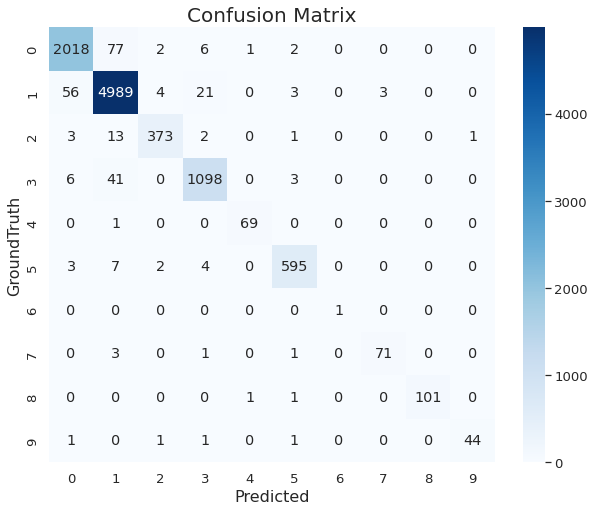

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(groundtruth, predict)
sns.set(font_scale=1.2) 
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted', size=16)
plt.ylabel('GroundTruth', size=16)
plt.title('Confusion Matrix', size=20)
plt.show()


#### Plot Result

In [2]:
result = pd.read_csv("./output/groundtruth_and_labels.csv")
groundtruth = result["GroundTruth"]
predict = result["PredictedLabels"]
report = pd.DataFrame(classification_report(result["GroundTruth"], result["PredictedLabels"], zero_division=0, output_dict=True)).T
report

,precision,recall,f1-score,support
0,0.960685,0.945632,0.953099,4212.000000
1,0.967294,0.981680,0.974434,10153.000000
2,0.968545,0.941401,0.954780,785.000000
3,0.967613,0.950327,0.958892,2295.000000
4,0.971223,0.957447,0.964286,141.000000
5,0.978776,0.981178,0.979975,1222.000000
6,1.000000,0.333333,0.500000,3.000000
7,0.985612,0.895425,0.938356,153.000000
8,1.000000,0.990244,0.995098,205.000000
9,0.978022,0.927083,0.951872,96.000000


In [5]:
report.to_csv("1.csv")

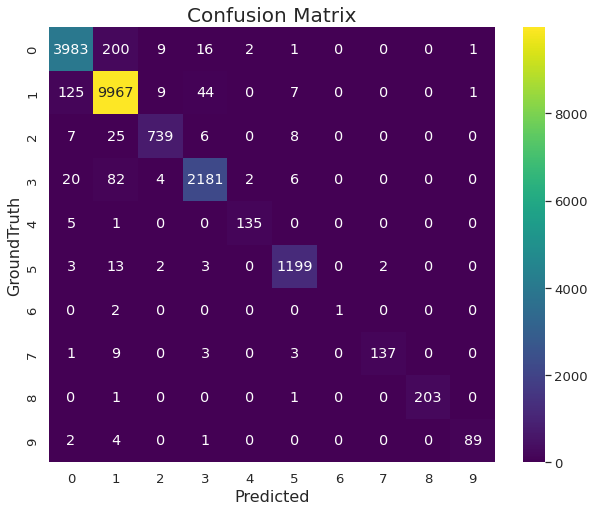

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(groundtruth, predict)
sns.set(font_scale=1.2) 
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted', size=16)
plt.ylabel('GroundTruth', size=16)
plt.title('Confusion Matrix', size=20)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

groundtruth = np.array(groundtruth)
predict = np.array(predict)

cm = confusion_matrix(groundtruth, predict)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')
plt.title('Blast')
plt.show()


In [3]:
# Load and preprocess the dataset.
dataset = load_and_preprocess_data()

# Create a Pandas Excel writer
excel_writer = pd.ExcelWriter('output/cv_labels.xlsx', engine='xlsxwriter')
best_val_accuracy = 0.0
best_model_path = ''
folder_path = "model/"

# StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(skf.split(dataset.iloc[:, 3:], dataset['label'])):
    print(f"\nFold {fold + 1}:")

    train_data, vali_data = dataset.iloc[train_index], dataset.iloc[val_index]

    X_train = reshape_features(train_data.iloc[:, 3:])
    X_val = reshape_features(vali_data.iloc[:, 3:])

    print(f'X_train shape: {X_train.shape}')
    print(f'X_val shape: {X_val.shape}')

    gru_attention_model = md.GRUWithAttentionModel(input_shape=cfg.INPUT_SHAPE, num_classes=cfg.NUM_CLASSES)
    gru_attention_model.compile_model()

    history = gru_attention_model.train(
        X_train,
        train_data['label'],
        X_val,
        vali_data['label'],
        batch_size=cfg.BATCH_SIZE,
        epochs=cfg.EPOCHS
    )

    # Track and save only the best model
    if history.history['val_accuracy'][-1] > best_val_accuracy:
        best_val_accuracy = history.history['val_accuracy'][-1]
        gru_attention_model.save_model(f'{folder_path}deepsub_new.h5')

    # eval
    val_predictions = gru_attention_model.model.predict(X_val, batch_size=cfg.BATCH_SIZE)
    ground_truth_labels = vali_data['label'].values
    predicted_labels = np.argmax(val_predictions, axis=1)

    # Export data to different sheets
    export_data = pd.DataFrame({'GroundTruth': ground_truth_labels, 'PredictedLabels': predicted_labels})
    sheet_name = f'fold{fold}'
    export_data.to_excel(excel_writer, sheet_name=sheet_name, index=False)
excel_writer.close()
print("\nTrain Over")


Fold 1:
X_train shape: (86691, 1, 1280)
X_val shape: (9633, 1, 1280)


2024-02-22 16:37:53.251188: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3152 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6
2024-02-22 16:37:53.253064: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 10083 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:25:00.0, compute capability: 8.6
2024-02-22 16:37:53.254631: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 10083 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:41:00.0, compute capability: 8.6
2024-02-22 16:37:53.256212: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 10083 MB memory:  -> device: 3, name: NVIDIA GeForce 

Epoch 1/200


2024-02-22 16:37:59.034495: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-02-22 16:37:59.230987: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f0b1402f2d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-22 16:37:59.231046: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2024-02-22 16:37:59.231053: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2024-02-22 16:37:59.231059: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2024-02-22 16:37:59.231063: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (3): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2024-02-22 16:37:59.231067: I tensorflow/compiler/xla/ser

43/43 [==============================] - 7s 23ms/step - loss: 1.3088 - accuracy: 0.5606 - val_loss: 0.9859 - val_accuracy: 0.6559
Epoch 2/200
43/43 [==============================] - 0s 10ms/step - loss: 0.8242 - accuracy: 0.7314 - val_loss: 0.6250 - val_accuracy: 0.8163
Epoch 3/200
43/43 [==============================] - 0s 11ms/step - loss: 0.5809 - accuracy: 0.8250 - val_loss: 0.4549 - val_accuracy: 0.8686
Epoch 4/200
43/43 [==============================] - 0s 9ms/step - loss: 0.4791 - accuracy: 0.8597 - val_loss: 0.3821 - val_accuracy: 0.8893
Epoch 5/200
43/43 [==============================] - 0s 11ms/step - loss: 0.4325 - accuracy: 0.8718 - val_loss: 0.3343 - val_accuracy: 0.9065
Epoch 6/200
43/43 [==============================] - 0s 10ms/step - loss: 0.4043 - accuracy: 0.8789 - val_loss: 0.3076 - val_accuracy: 0.9153
Epoch 7/200
43/43 [==============================] - 0s 10ms/step - loss: 0.3853 - accuracy: 0.8839 - val_loss: 0.2903 - val_accuracy: 0.9176
Epoch 8/200
43/43 [

/home/linjw/anaconda3/envs/pytorch/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 0s 4ms/step

Fold 2:
X_train shape: (86691, 1, 1280)
X_val shape: (9633, 1, 1280)
Epoch 1/200
43/43 [==============================] - 4s 23ms/step - loss: 1.3067 - accuracy: 0.5605 - val_loss: 0.9847 - val_accuracy: 0.6686
Epoch 2/200
43/43 [==============================] - 0s 10ms/step - loss: 0.8228 - accuracy: 0.7327 - val_loss: 0.6276 - val_accuracy: 0.8171
Epoch 3/200
43/43 [==============================] - 0s 10ms/step - loss: 0.5840 - accuracy: 0.8238 - val_loss: 0.4589 - val_accuracy: 0.8693
Epoch 4/200
43/43 [==============================] - 0s 11ms/step - loss: 0.4810 - accuracy: 0.8579 - val_loss: 0.3767 - val_accuracy: 0.9002
Epoch 5/200
43/43 [==============================] - 0s 10ms/step - loss: 0.4345 - accuracy: 0.8700 - val_loss: 0.3450 - val_accuracy: 0.9010
Epoch 6/200
43/43 [==============================] - 0s 10ms/step - loss: 0.4054 - accuracy: 0.8786 - val_loss: 0.3114 - val_accuracy: 0.9151
Epoch 7/200
43/43 [========

In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, matthews_corrcoef, confusion_matrix

results = []
for fold in range(10):
    fold_data = pd.read_excel('output/cv_labels.xlsx', sheet_name=f'fold{fold}')

    ground_truth_labels = fold_data['GroundTruth'].values
    predicted_labels = fold_data['PredictedLabels'].values

    mcc = matthews_corrcoef(ground_truth_labels, predicted_labels)
    acc = accuracy_score(ground_truth_labels, predicted_labels) 
    precision = precision_score(ground_truth_labels, predicted_labels, zero_division=0, average='macro')
    recall = recall_score(ground_truth_labels, predicted_labels, zero_division=0, average='macro')
    f1 = f1_score(ground_truth_labels, predicted_labels, zero_division=0, average='macro')

    results.append([mcc, acc, precision, recall, f1])

df_results = pd.DataFrame(results, columns=['MCC', 'ACC', 'Precision', 'Recall', 'F1'])

df_results


,MCC,ACC,Precision,Recall,F1
0,0.953663,0.969791,0.882330,0.861123,0.871499
1,0.953849,0.969895,0.945905,0.957866,0.948209
2,0.953390,0.969584,0.975601,0.915527,0.937140
3,0.954002,0.969999,0.883070,0.857063,0.869544
4,0.956566,0.971657,0.977411,0.963762,0.970427
5,0.955449,0.970930,0.879162,0.870081,0.874509
6,0.953522,0.969684,0.876028,0.862424,0.869061
7,0.950627,0.967816,0.879039,0.855708,0.866916
8,0.953055,0.969373,0.979616,0.963825,0.971456
9,0.952552,0.969061,0.879688,0.863517,0.871243


In [16]:
mean_values = df_results.mean()
std_values = df_results.std()

avg_std_row = round(mean_values,3).astype(str) + " ± " + round(std_values,3).astype(str)

avg_std_df = pd.DataFrame([avg_std_row], columns=df_results.columns, index=['Average ± Std'])

df_results_with_avg_std = pd.concat([df_results, avg_std_df])

df_results_with_avg_std

,MCC,ACC,Precision,Recall,F1
0,0.953663,0.969791,0.88233,0.861123,0.871499
1,0.953849,0.969895,0.945905,0.957866,0.948209
2,0.95339,0.969584,0.975601,0.915527,0.93714
3,0.954002,0.969999,0.88307,0.857063,0.869544
4,0.956566,0.971657,0.977411,0.963762,0.970427
5,0.955449,0.97093,0.879162,0.870081,0.874509
6,0.953522,0.969684,0.876028,0.862424,0.869061
7,0.950627,0.967816,0.879039,0.855708,0.866916
8,0.953055,0.969373,0.979616,0.963825,0.971456
9,0.952552,0.969061,0.879688,0.863517,0.871243


In [17]:
df_results_with_avg_std.to_csv("cv_report.csv",index=False)

#### Metrics

In [26]:
from sklearn.metrics import matthews_corrcoef

# Initialize lists to store metrics for each fold
all_accuracies, all_mccs, all_recalls, all_f1_scores, all_recall_macro = [], [], [], [], []

# Loop through each fold
for fold in range(10):
    # Calculate metrics for each fold
    accuracy = accuracy_score(all_ground_truth_labels[fold], all_predicted_labels[fold])
    mcc = matthews_corrcoef(all_ground_truth_labels[fold], all_predicted_labels[fold])
    recall = recall_score(all_ground_truth_labels[fold], all_predicted_labels[fold], average='macro')
    f1 = f1_score(all_ground_truth_labels[fold], all_predicted_labels[fold], average='macro')
    macro =  pd.DataFrame(classification_report(all_ground_truth_labels[fold], all_predicted_labels[fold], zero_division=0, output_dict=True)).T['recall']['macro avg']
    
    # Append metrics to lists
    all_accuracies.append(accuracy)
    all_mccs.append(mcc)
    all_recalls.append(recall)
    all_f1_scores.append(f1)
    all_recall_macro.append(macro)

# Calculate averages and standard deviations
average_accuracy = np.mean(all_accuracies)
std_accuracy = np.std(all_accuracies)

average_mcc = np.mean(all_mccs)
std_mcc = np.std(all_mccs)

average_recall = np.mean(all_recalls)
std_recall = np.std(all_recalls)

average_f1 = np.mean(all_f1_scores)
std_f1 = np.std(all_f1_scores)

average_macro = np.mean(all_recall_macro)
std_macro = np.std(all_recall_macro)


# Display results
print(f"\nAverage Accuracy: {average_accuracy:.4f} (Std Dev: {std_accuracy:.4f})")
print(f"Average MCC: {average_mcc:.4f} (Std Dev: {std_mcc:.4f})")
print(f"Average Recall: {average_recall:.4f} (Std Dev: {std_recall:.4f})")
print(f"Average F1 Score: {average_f1:.4f} (Std Dev: {std_f1:.4f})")
# print(f"Average Recall Macro: {average_macro:.4f} (Std Dev: {std_macro:.4f})")



Average Accuracy: 0.9698 (Std Dev: 0.0010)
Average MCC: 0.9537 (Std Dev: 0.0015)
Average Recall: 0.8971 (Std Dev: 0.0454)
Average F1 Score: 0.9050 (Std Dev: 0.0433)


In [13]:
rawdata = pd.read_csv("./output/groundtruth_and_labels.csv")
from sklearn.metrics import classification_report
blast_report = pd.DataFrame(classification_report(rawdata["GroundTruth"], rawdata["PredictedLabels"], zero_division=0, output_dict=True)).T
blast_report

,precision,recall,f1-score,support
0,0.960685,0.945632,0.953099,4212.000000
1,0.967294,0.981680,0.974434,10153.000000
2,0.968545,0.941401,0.954780,785.000000
3,0.967613,0.950327,0.958892,2295.000000
4,0.971223,0.957447,0.964286,141.000000
5,0.978776,0.981178,0.979975,1222.000000
6,1.000000,0.333333,0.500000,3.000000
7,0.985612,0.895425,0.938356,153.000000
8,1.000000,0.990244,0.995098,205.000000
9,0.978022,0.927083,0.951872,96.000000


In [5]:
all_ground_truth_labels = np.concatenate(all_ground_truth_labels)
all_predicted_labels = np.concatenate(all_predicted_labels)

In [6]:
print("\nOverall Classification Report:")
report = pd.DataFrame(classification_report(all_ground_truth_labels, all_predicted_labels,output_dict=True)).T
report


Overall Classification Report:


,precision,recall,f1-score,support
0,0.965575,0.952279,0.958881,21060.000000
1,0.968355,0.983196,0.975719,50763.000000
2,0.972718,0.945436,0.958883,3922.000000
3,0.971023,0.955029,0.962960,11474.000000
4,0.978663,0.973126,0.975887,707.000000
5,0.986192,0.970054,0.978056,6111.000000
6,0.833333,0.357143,0.500000,14.000000
7,0.972145,0.911227,0.940701,766.000000
8,0.993097,0.980526,0.986771,1027.000000
9,0.982759,0.950000,0.966102,480.000000
